<a href="https://colab.research.google.com/github/shapirka/neur_265kaileyshapiro/blob/Coding-homework/Coding_homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Kailey Shapiro
*Neur 265,*  **Mar 4, 2024**

In [1]:
#2 Importing modules
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
#3 Importing patch_seq data
url = 'https://raw.githubusercontent.com/hallockh/neur_265/main/data/patch_seq_expanded.csv'
patch_seq = pd.read_csv(url)

Text(0, 0.5, 'Count')

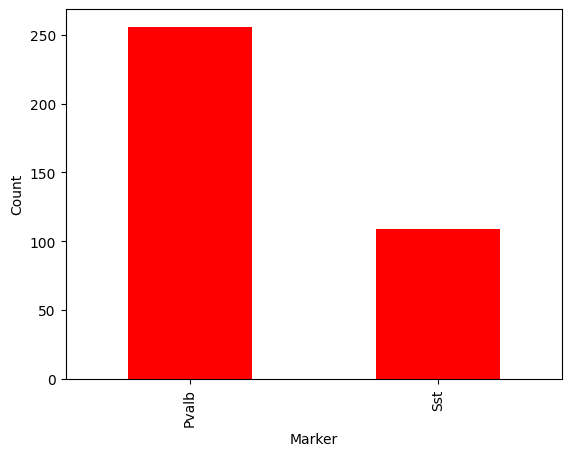

In [3]:
#4 Creating bar graph
marker_count = patch_seq['Marker'].value_counts()
marker_count.plot(kind = 'bar', color = 'red')
plt.xlabel('Marker')
plt.ylabel('Count')

<Axes: ylabel='Marker'>

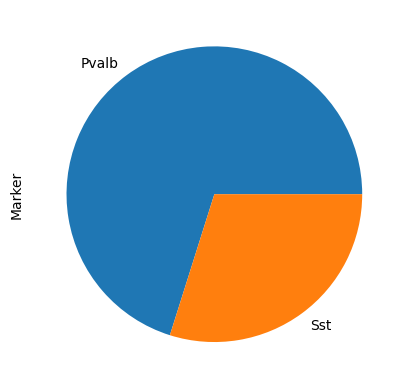

In [4]:
#5 Creating a Pie Chart
marker_count.plot(kind = 'pie')

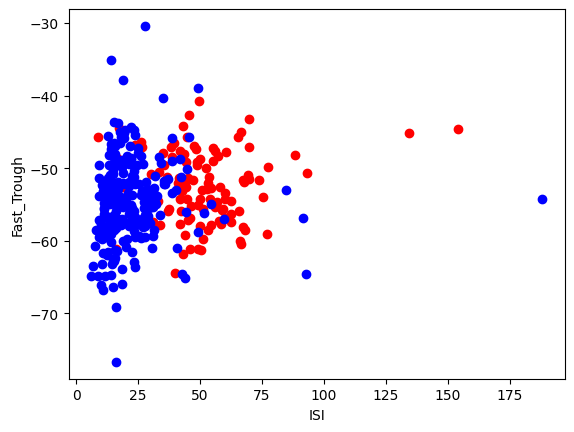

In [5]:
#6 Scatter plot using 'for' loop
patch_length = len(patch_seq)
for i in range(patch_length):
  marker = patch_seq.iloc[i, 2]
  if marker == 'Sst':
        color = 'red'
  elif marker == 'Pvalb':
        color = 'blue'
  plt.scatter(patch_seq.iloc[i, 0], patch_seq.iloc[i, 1], color = color, label = marker)
plt.xlabel('ISI')
plt.ylabel('Fast_Trough')
plt.show()

In [6]:
#7 Creating function patchScatter()

def patchScatter(patch_seq):
  """
  This is a function that will produce a scatter plot of ISI vs Fast_Trough data points in various colors
  """
  patch_length = len(patch_seq)
  for i in range(patch_length):
    marker = patch_seq.iloc[i, 2]
    if marker == 'Sst':
          color = 'red'
    elif marker == 'Pvalb':
          color = 'blue'
    plt.scatter(patch_seq.iloc[i, 0], patch_seq.iloc[i, 1], color = color, label = marker)
  plt.xlabel('ISI')
  plt.ylabel('Fast_Trough')
  plt.show()

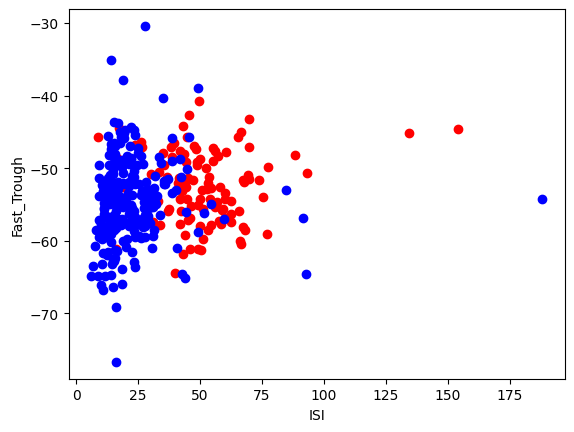

In [7]:
patchScatter(patch_seq)

In [8]:
#8 Finding mean, SD and range
stats_FT = patch_seq.groupby('Marker')['Fast_Trough'].describe()
stats_FT

,count,mean,std,min,25%,50%,75%,max
Marker,,,,,,,,
Pvalb,256.0,-54.548074,5.870670,-76.687508,-57.914063,-54.490629,-51.364065,-30.406252
Sst,109.0,-52.514968,4.958103,-64.375008,-55.931252,-52.568752,-48.500000,-40.781254


#### #9 Describing Sst vs Pvalb neurons
* the Pvalb neurons have a more negative undershoot since their minimum value is -76.
* There is a greater standard deviation for the Pvalb neurons than the Sst neurons (more variability).
* The Pvalb neurons also have a higher action potential maximum since their most positive value is -30, compared to Sst's of -40.

In [14]:
#10 Finding the Fast_Trough of the data
patch_seq.groupby('Marker')['Fast_Trough'].skew()

Marker
Pvalb    0.19536
Sst      0.00125
Name: Fast_Trough, dtype: float64

#### #11 Interpreting Results of Skew - Fast_Trough
* The Pvalb skew is much greater than 0.05, indicating that it is skewed right
* The Sst skew is between -0.05 and 0.05, indicating that there is no skew

In [15]:
#12 Finding skew of ISI data
patch_seq.groupby('Marker')['ISI'].skew()

Marker
Pvalb    5.596386
Sst      1.857850
Name: ISI, dtype: float64

#### #13 Interpreting resuls of skew - ISI
* Both Pvalb and Sst are skewed right since their skews are much larger than 0.05, especially the Pvalb neurons have a strong skew

In [11]:
#14 T-test comparing Fast_Trough Values
sst_neurons = patch_seq[patch_seq['Marker'] == 'Sst']
pvalb_neurons = patch_seq[patch_seq['Marker'] == 'Pvalb']
ttest_FT = stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])
ttest_FT

TtestResult(statistic=3.1660773376899147, pvalue=0.0016757984214133585, df=363.0)

#### #15 Describing T-test results - Fast_Trough
* The p value is less than 0.05 indicating that the results are significant
* This means that the undershoot value does differ significantly in the Fast_Trough column between Sst and Pvalb neurons

In [12]:
#16 T-test comparing ISI values
patch_seq_filter = patch_seq.dropna()
sst_neurons = patch_seq_filter[patch_seq_filter['Marker'] == 'Sst']
pvalb_neurons = patch_seq_filter[patch_seq_filter['Marker'] == 'Pvalb']
ttest_ISI = stats.ttest_ind(sst_neurons['ISI'], pvalb_neurons['ISI'])
ttest_ISI

TtestResult(statistic=14.643966775010774, pvalue=2.694292788633572e-38, df=354.0)

#### #17 Describing T-test results - ISI
* The p value is much smaller than 0.05 which indicates the results are very significant, so we can reject the null hypothesis
* The positive statistic also lets us know that the Sst neurons have a higher ISI value than the Pvalb neurons

# Coding Homework #4

**Instructions**

1. Make a *Markdown Cell* that contains the following information:
- Your name (small header)
- The name of this class (italicized)
- The date (bolded)

2. Create a *Code Cell* that imports relevant modules - specifically, <code>pandas as pd</code>, <code>matplotlib.pyplot as plt</code>, and <code>scipy.stats as stats</code>.

3. For this assignment, you'll be using the <code>patch_seq_expanded.csv</code> file located in our class GitHub repo. Create a *Code Cell* that loads this file in as a <code>Pandas dataFrame</code> called <code>patch_seq</code>.

4. In a new *Code Cell*, using the <code>df.plot</code> method from the <code>pandas</code> module, make a bar graph that displays the value counts (how many observations) from the "Marker" column of your <code>patch_seq</code> variable. Label your x and y-axes.

5. In a new *Code Cell*, repeat step 4, but make a pie chart instead of a bar graph.

6. In a new *Code Cell*, use a <code>for</code> loop to make a scatter plot of the "ISI" (on the x-axis) and "Fast_Trough" (on the y-axis) values in your <code>patch_seq</code> dataframe. Your loop should make data points from "Sst" neurons <font color = 'red'>red</font>, and data points from "Pvalb" neurons <font color = 'blue'>blue</font>.

7. In a new *Code Cell*, create a <code>function</code> called <code>patchScatter()</code> that will output the scatter plot created in step 6 when you call it. Don't forget to tell it to show your scatter plot!

8. In a new *Code Cell*, return the mean, standard deviation, and range of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>describe</code>, like so:

<code>patch_seq.groupby('Marker')['Fast_Trough'].describe()</code>

9. In a new *Markdown Cell*, describe the difference in means between "Sst" neurons and "Pvalb" neurons. Which group has a more negative undershoot following an action potential?

10. In a new *Code Cell*, return the skewness of the "Fast_Trough" column for "Sst" neurons and "Pvalb" neurons. You can do this with the <code>pandas</code> method <code>skew</code> (follow the syntax in step 8 to apply this method to <code>patch_seq</code>).

11. In a new *Markdown Cell*, interpret the results of your skewness test. Generally, values >0.5, or <-0.5, indicate a skewed distribution, while values between -0.5 and 0.5 indicate a normal distribution.

12. In a new *Code Cell*, repeat step 10 for the "ISI" column of <code>patch_seq</code>.

13. In a new *Markdown Cell*, repeat step 11 for the "ISI" column of <code>patch_seq</code>.

14. Finally, in a new *Code Cell*, let's perform a t-test to see if our "Fast_Trough" and "ISI" values differ between "Sst" and "Pvalb" neurons. To do this for our "Fast_Trough" values, we should first isolate each group and make each of them into a separate variable. An example of how to do this for "Sst" neurons is below:

<code>sst_neurons = patch_seq[patch_seq['Marker']=='Sst']</code>

Use the same code to create another variable called <code>pvalb_neurons</code>. Once you've made your two variables, perform an independent-samples t-test to compare "Fast_Trough" values between the two groups:

<code>stats.ttest_ind(sst_neurons['Fast_Trough'], pvalb_neurons['Fast_Trough'])</code>.

15. In a *Markdown Cell*, describe the results of your t-test. Does the undershoot voltage significantly differ betwen the two groups?

16. In a new *Code Cell*, repeat step 14 for "ISI". You won't need to create new <code>sst_neurons</code> and <code>pvalb_neurons</code> variables - you'll just need to run a new t-test.

17. In a new *Markdown Cell*, repeat step 15 for the results of your new t-test.

18. Make sure to put a <code>#</code> in each *Code Cell* to describe what it does.

19. Save a copy of this notebook to your GitHub repo with the title <code>coding_homework_4.ipynb</code>.


